In [1]:
import numpy as np
import pandas as pd
from scipy.integrate import simps
from glob import glob
from pathlib import Path
from reader import ParseNeware
import matplotlib.pyplot as plt

In [8]:
p = Path('/home/mmemc/projects/expt/NMC811_comparison')
#cell_ids = np.array([[103240],
#                     [103714]])
cell_ids = np.array([[102359, 103247],
                     [103283, 102371]])
cell_labels = np.array([['102359 - PC811', '103247 - Ni83_811'],
                       ['103283 - BM811', '102371 - SC811']])
dims = np.shape(cell_ids)
print(dims)
print(len(dims))
tmppath = p / '*{}*.txt'.format(cell_ids[0,0])
print(tmppath.absolute())

(2, 2)
2
/home/mmemc/projects/expt/NMC811_comparison/*102359*.txt


Found 29 cycle labels.
Found 23 step labels.
Found 20 record labels.
Found 1755 cycles.
Found charge C-rates: ['C/20', 'C/3']
Found discharge C-rates: ['C/20', 'C/3']
Found 29 cycle labels.
Found 23 step labels.
Found 20 record labels.
Found 1755 cycles.
Found charge C-rates: ['C/20', 'C/3']
Found discharge C-rates: ['C/20', 'C/3']
Found 29 cycle labels.
Found 23 step labels.
Found 20 record labels.
Found 1760 cycles.
Found charge C-rates: ['C/20', 'C/3']
Found discharge C-rates: ['C/20', 'C/3']
Found 29 cycle labels.
Found 23 step labels.
Found 20 record labels.
Found 1760 cycles.
Found charge C-rates: ['C/20', 'C/3']
Found discharge C-rates: ['C/20', 'C/3']


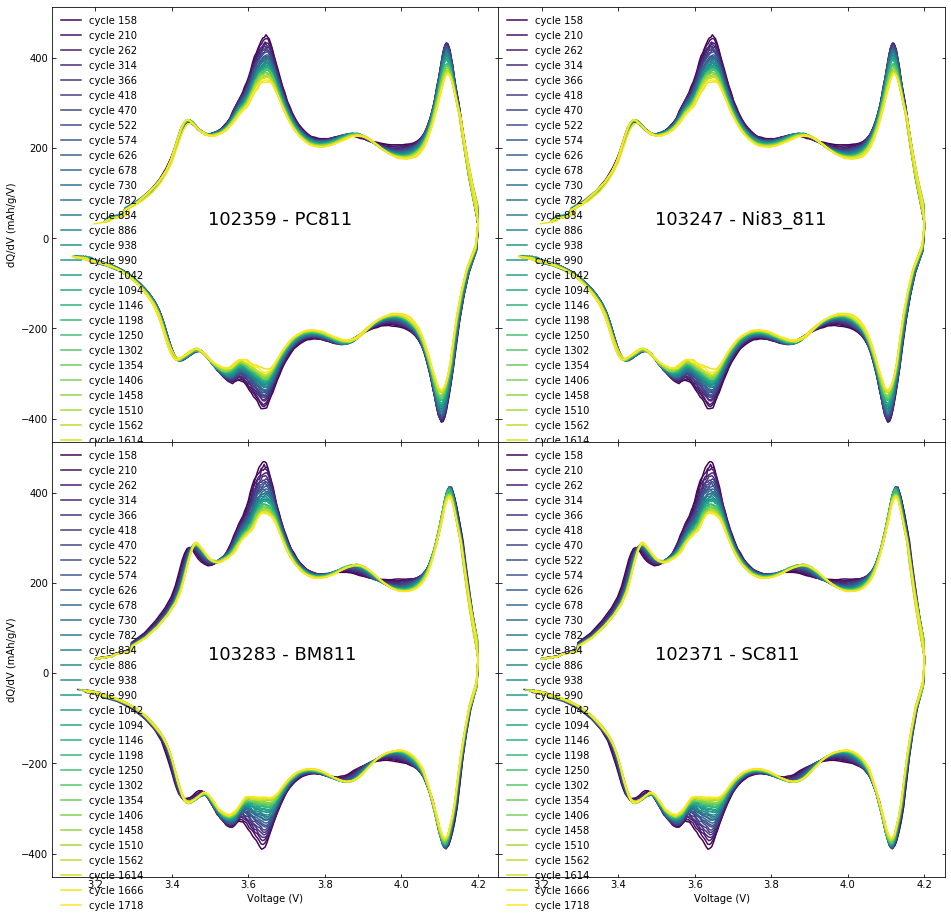

In [11]:
fig, axs = plt.subplots(nrows=dims[0], ncols=dims[1], sharex=True, sharey=True,
                        figsize=(8*dims[1], 8*dims[0]),
                        gridspec_kw={'hspace':0.0, 'wspace':0.0})

#spacing = [525, 530]   # Step size in cycles
#start = [104, 104]     # First cycle.

for i in range(dims[0]):
    for j in range(dims[1]):
        fpath = p / '*{}*.txt'.format(cell_ids[i,i])
        pstr = fpath.absolute().as_posix()
        fname = glob(pstr)[0]
        #fname = glob(p / '*{}*.txt'.format(cell_ids[i,j]))[0]
        #fname = glob('{}/*{}*.txt'.format(path, cell_ids[i,j]))[0]
        nd = ParseNeware(fname)
        
        ncyc = nd.get_ncyc()
        #cycnums = np.arange(104, ncyc, spacing[i])
        selected_cycs = nd.select_by_rate('C/20', cyctype='cycle')
        cycnums = selected_cycs[3:]
        colors = plt.get_cmap('viridis')(np.linspace(0,1,len(cycnums)))
        with pd.ExcelWriter(p / '{0}_dQdV-voltage.xlsx'.format(cell_ids[i,j])) as writer:
        #with pd.ExcelWriter('{0}/{1}_dQdV-voltage.xlsx'.format(path, cell_ids[i,j])) as writer:
            for n in range(len(cycnums)):
                # Voltage curves
                #cap, volt = nd.get_vcurve(cycnum=cycnums[n], cyctype='cycle')
                #axs[i,j].plot(cap, volt, color=colors[n], label='cycle {}'.format(cycnums[n]))
                #df = pd.DataFrame(data={'Specific Capacity': cap, 'Voltage': volt})

                # dQ/dV
                voltage, dQdV = nd.get_dQdV(cycnum=cycnums[n], avgstride=5)
                axs[i,j].plot(voltage, dQdV, color=colors[n], label='cycle {}'.format(cycnums[n]))
                #df = pd.DataFrame(data={'Voltage': voltage, 'dQdV': dQdV})
                
                
                # Write to excel file.
                #df.to_excel(writer, sheet_name='cycle {}'.format(cycnums[n]), index=False)
        
        # Figure params for voltage curves
        #axs[-1,j].set_xlabel('Specific Capacity ({})'.format(nd.recunits['Capacity_Density']))
        #axs[i,0].set_ylabel('Voltage (V)')
        
        # Figure params for dQ/dV
        axs[-1,j].set_xlabel('Voltage (V)')
        axs[i,0].set_ylabel('dQ/dV (mAh/g/V)')
        #axs[i].set_ylim(-600, 599)
        #axs[i].set_xlim(4.0, 4.2)
        

        axs[i,j].annotate('{}'.format(cell_labels[i,j]), xy=(0.35, 0.5), xycoords='axes fraction', fontsize=18)
        axs[i,j].legend(frameon=False)
        axs[i,j].tick_params(direction='in', top=True, right=True)
plt.savefig(p / 'dQdV_comparison_SC811-PC811-Ni83_811-BM811_Cover20.jpg'.format(path), bbox_inches='tight')
#plt.savefig('{}/dQdV_comparison_SC811-PC811-Ni83_811-BM811_Cover20.jpg'.format(path), bbox_inches='tight') 

Found 29 cycle labels.
Found 23 step labels.
Found 20 record labels.
Found 1755 cycles.
Found charge C-rates: ['C/20', 'C/3']
Found discharge C-rates: ['C/20', 'C/3']
[]
[]
Found 29 cycle labels.
Found 23 step labels.
Found 21 record labels.
Found 747 cycles.
Found charge C-rates: ['C/20', 'C/3']
Found discharge C-rates: ['C/20', 'C/3']


/home/mmemc/anaconda3/lib/python3.7/site-packages/scipy/integrate/quadrature.py:376: RuntimeWarning: divide by zero encountered in true_divide
  h0divh1 = h0 / h1
/home/mmemc/anaconda3/lib/python3.7/site-packages/scipy/integrate/quadrature.py:378: RuntimeWarning: divide by zero encountered in true_divide
  y[slice1]*hsum*hsum/hprod +
/home/mmemc/anaconda3/lib/python3.7/site-packages/scipy/integrate/quadrature.py:379: RuntimeWarning: invalid value encountered in add
  y[slice2]*(2-h0divh1))


[]
[]
Found 21 cycle labels.
Found 12 step labels.
Found 10 record labels.
Found 1433 cycles.
Found charge C-rates: ['C/20', 'C/3', 'C/40', 'C/5']
Found discharge C-rates: ['C/20', 'C/3']


/home/mmemc/anaconda3/lib/python3.7/site-packages/scipy/integrate/quadrature.py:378: RuntimeWarning: invalid value encountered in add
  y[slice1]*hsum*hsum/hprod +


[]
[]
Found 29 cycle labels.
Found 23 step labels.
Found 20 record labels.
Found 1760 cycles.
Found charge C-rates: ['C/20', 'C/3']
Found discharge C-rates: ['C/20', 'C/3']
[]
[]


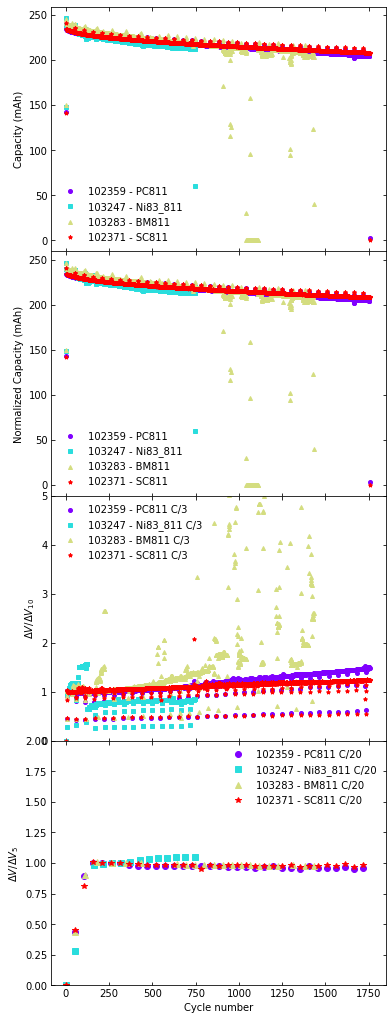

In [14]:
fig, axs = plt.subplots(nrows=4, ncols=1, sharex=True,
                        figsize=(6, 18),
                        gridspec_kw={'hspace':0.0, 'wspace':0.0})
ids = cell_ids.flatten()
labels = cell_labels.flatten()
colors = plt.get_cmap('rainbow')(np.linspace(0,1,len(ids)))
markers = ['o', 's', '^', '*']
for i in range(len(ids)):
    fpath = p / '*{}*.txt'.format(ids[i])
    pstr = fpath.absolute().as_posix()
    fname = glob(pstr)[0]
    #fname = glob('{}/*{}*.txt'.format(path, ids[i]))[0]
    nd = ParseNeware(fname)
    # Capacity curves
    cyc_id, dcap = nd.get_discap(specific=False)
    axs[0].plot(cyc_id, dcap, '{}'.format(markers[i]), color=colors[i], label=labels[i], markersize=4.0)
    cyc_id, dcap = nd.get_discap(specific=False)
    axs[1].plot(cyc_id, dcap, '{}'.format(markers[i]), color=colors[i], label=labels[i], markersize=4.0)
    # Delta V
    selected_cycs = nd.select_by_rate('C/3', cyctype='cycle')
    cyc_id, dV = nd.get_deltaV(normcyc=10, cycnums=selected_cycs)
    axs[2].plot(cyc_id, dV, '{}'.format(markers[i]), color=colors[i], label='{0} C/3'.format(labels[i]), markersize=4.0)
    
    selected_cycs = nd.select_by_rate('C/20', cyctype='cycle')
    cyc_id, dV = nd.get_deltaV(normcyc=5, cycnums=selected_cycs)
    axs[3].plot(cyc_id, dV, '{}'.format(markers[i]), color=colors[i], label='{0} C/20'.format(labels[i]), markersize=6.0)
    

    
# Figure params for capacity curves
axs[0].set_ylabel('Capacity (mAh)')
axs[1].set_ylabel('Normalized Capacity (mAh)')
axs[2].set_ylabel(r'$\Delta V / \Delta V_{10}$')
axs[3].set_ylabel(r'$\Delta V / \Delta V_5$')

axs[-1].set_xlabel('Cycle number')

axs[2].set_ylim(0,5)
axs[3].set_ylim(0,2)

for i in range(4):
    axs[i].legend(frameon=False)
    axs[i].tick_params(direction='in', top=True, right=True)

plt.savefig(p / 'cap-dV_comparison_SC811-PC811-Ni83_811-BM811.jpg'.format(path), bbox_inches='tight')
#plt.savefig('{}/cap-dV_comparison_SC811-PC811-Ni83_811-BM811.jpg'.format(path), bbox_inches='tight') 

Found 28 cycle labels.
Found 23 step labels.
Found 18 record labels.
2573


__main__:13: RuntimeWarning: divide by zero encountered in double_scalars
__main__:13: RuntimeWarning: invalid value encountered in double_scalars


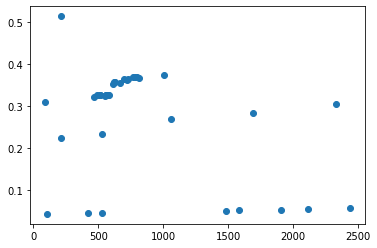

In [63]:
# Troubleshoot delta V
fname = glob('{}/*{}*.txt'.format(path, ids[1]))[0]
nd = ParseNeware(fname)
ncyc = nd.get_ncyc()
print(ncyc)
cycnums = np.arange(1, ncyc+1)
dV = np.zeros(ncyc, dtype=float)
for i in range(ncyc):
    Qchg, Vchg = nd.get_vcurve(cycnum=i+1, cyctype='charge')
    #print(Qchg[0], Qchg[-1])
    # Try interpolating.
    Qdis, Vdis = nd.get_vcurve(cycnum=i+1, cyctype='discharge')
    #print(Qdis[0], Qdis[-1])
    avgVchg = (1/(Qchg[-1] - Qchg[0]))*simps(Vchg, Qchg, even='last')
    avgVdis = (1/(Qdis[-1] - Qdis[0]))*simps(Vdis, Qdis, even='last')
    dV[i] = avgVchg - avgVdis
    
plt.plot(cycnums, dV, 'o')

In [17]:
# Finding cells from Cell_ID


Found 28 cycle labels.
Found 23 step labels.
Found 18 record labels.
[None, 'h:min:s.ms', 'V', 'mA', 'oC', 'mAh', 'mAh/g', 'Wh', 'Wh/kg', None, 'oC', 'oC', 'oC', 'W', 'mAh', 'mAh', 'Wh', 'Wh']
2573
[10.5, 209.9]
[10.5, 104.9, 209.8, 419.8, 629.8]
(array([   0,    1,  102,  103,  208,  209,  314,  315,  420,  421,  526,
        527,  632,  633,  738,  739,  844,  845,  950,  951, 1056, 1057,
       1162, 1163, 1268, 1269, 1374, 1375, 1480, 1481, 1586, 1587, 1692,
       1693, 1798, 1799, 1904, 1905, 2010, 2011, 2116, 2117, 2222, 2223,
       2328, 2329, 2434, 2435, 2540, 2541]),)
['C/20', '1C']
['C/20', 'C/2', '1C', '2C', '3C']


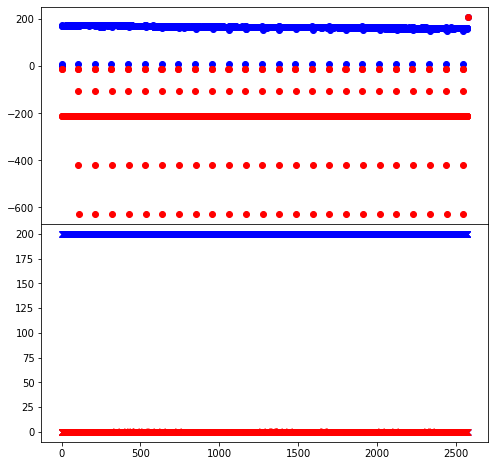

In [94]:
# Test current 
fname = glob('{}/*{}*.txt'.format(path, ids[1]))[0]
nd = ParseNeware(fname)
print([nd.recunits[s] for s in nd.recunits])
ncyc = nd.get_ncyc()
print(ncyc)
cycnums = np.arange(1, ncyc+1)
chg_cur_avg = np.zeros(ncyc)
chg_cur_max = np.zeros(ncyc)
chg_cur_diff = np.zeros(ncyc)
dis_cur_avg = np.zeros(ncyc)
dis_cur_diff = np.zeros(ncyc)
dis_cur_max = np.zeros(ncyc)
other_cur = [[], []]
other_nums = []
for i in range(ncyc):
    cycle = nd.rec.loc[nd.rec['Cycle_ID'] == cycnums[i]]
    stepnums = cycle['Step_ID'].unique()
    chg = cycle.loc[cycle['Step_ID'] == stepnums[0]]
    chg_cur = chg['Current'].values
    chg_cur_avg[i] = np.mean(chg_cur)
    chg_cur_max[i] = np.amax(np.absolute(chg_cur))
    chg_cur_diff[i] = np.amax(chg_cur) - np.amin(chg_cur)
    dis = cycle.loc[cycle['Step_ID'] == stepnums[-1]]
    dis_cur = dis['Current'].values
    dis_cur_avg[i] = np.mean(dis_cur)
    dis_cur_max[i] = np.amax(np.absolute(dis_cur))
    dis_cur_diff[i] = np.amax(dis_cur) - np.amin(dis_cur)
    if len(stepnums) > 2:
        cv = cycle.loc[cycle['Step_ID'] == stepnums[1]]
        cv_cur = cv['Current'].values
        other_cur[0].append(np.amax(cv_cur))
        other_cur[1].append(np.amin(cv_cur))
        other_nums.append(i+1)

fig, axs = plt.subplots(nrows=2, ncols=1, sharex=True,
                        figsize=(8, 8),
                        gridspec_kw={'hspace':0.0, 'wspace':0.0})
axs[0].plot(cycnums, chg_cur_avg, 'bo')    
axs[0].plot(cycnums, dis_cur_avg, 'ro')
axs[0].plot(other_nums, other_cur[0], 'gx')
axs[0].plot(other_nums, other_cur[1], 'gx')
axs[1].plot(cycnums, chg_cur_diff, 'bx')
axs[1].plot(cycnums, dis_cur_diff, 'rx')

chg_unique = np.unique(np.around(chg_cur_max, decimals=1))
chg_unique = chg_unique[np.where(chg_unique > 0.0)[0]]  # Don't inclue zero current
dis_unique = np.unique(np.around(dis_cur_max, decimals=1)) # np.unique() returns sorted array.
dis_unique = dis_unique[np.where(dis_unique > 0.0)[0]]
chg_cur_rates = [chg_unique[0]]
dis_cur_rates = [dis_unique[0]]
for j in range(len(chg_unique)):
        d = np.absolute(chg_cur_rates[-1] - chg_unique[j])
        if d > 1.0:
            chg_cur_rates.append(chg_unique[j])
for j in range(len(dis_unique)):
        d = np.absolute(dis_cur_rates[-1] - dis_unique[j])
        if d > 1.0:
            dis_cur_rates.append(dis_unique[j])
print(chg_cur_rates)
print(dis_cur_rates) 
# Get capacity of first cycle at smallest dicharge current. This will be the reference capacity to determine C-rate.
inds = np.where((dis_cur_max - dis_cur_rates[0]) < 1.0)
print(inds)
cyc_id, dcap = nd.get_discap(specific=False)
ref_cap = np.amax(dcap)
RATES = np.array([1/160, 1/80, 1/40, 1/20, 1/10, 1/5, 1/2, 1, 2, 3, 4, 5])
CRATES = ['C/160', 'C/80', 'C/40', 'C/20', 'C/10', 'C/5', 'C/2', '1C', '2C', '3C', '4C', '5C']
chg_crates = []
for i in range(len(chg_cur_rates)):
    cr = chg_cur_rates[i] / ref_cap
    ind = np.argmin(np.absolute(RATES - cr))
    chg_crates.append(CRATES[ind])
print(chg_crates)
dis_crates = []
for i in range(len(dis_cur_rates)):
    cr = dis_cur_rates[i] / ref_cap
    ind = np.argmin(np.absolute(RATES - cr))
    dis_crates.append(CRATES[ind])
print(dis_crates)